In [1]:
import sys
print(sys.prefix)

/opt/anaconda3/envs/jupyterhub


In [2]:
import tensorflow as tf
print(tf.__version__)

2025-12-11 11:10:09.187659: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 11:10:09.234397: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 11:10:10.411711: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.20.0


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


GPU Available:  []


W0000 00:00:1765426211.138376 4016580 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
sns.set(font_scale=2)

In [14]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [15]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_train = X_train.astype('float32') / 255

In [20]:
X_test = X_test.astype('float32') / 255

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train)

In [23]:
y_train.shape

(60000, 10)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [25]:
y_test = to_categorical(y_test)

In [26]:
y_test.shape

(10000, 10)

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
cnn = Sequential()

In [29]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [30]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

/opt/anaconda3/envs/jupyterhub/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [32]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [33]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
cnn.add(Flatten())

In [35]:
cnn.add(Dense(units=128, activation='relu'))

In [36]:
cnn.add(Dense(units=10, activation='softmax'))

In [37]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

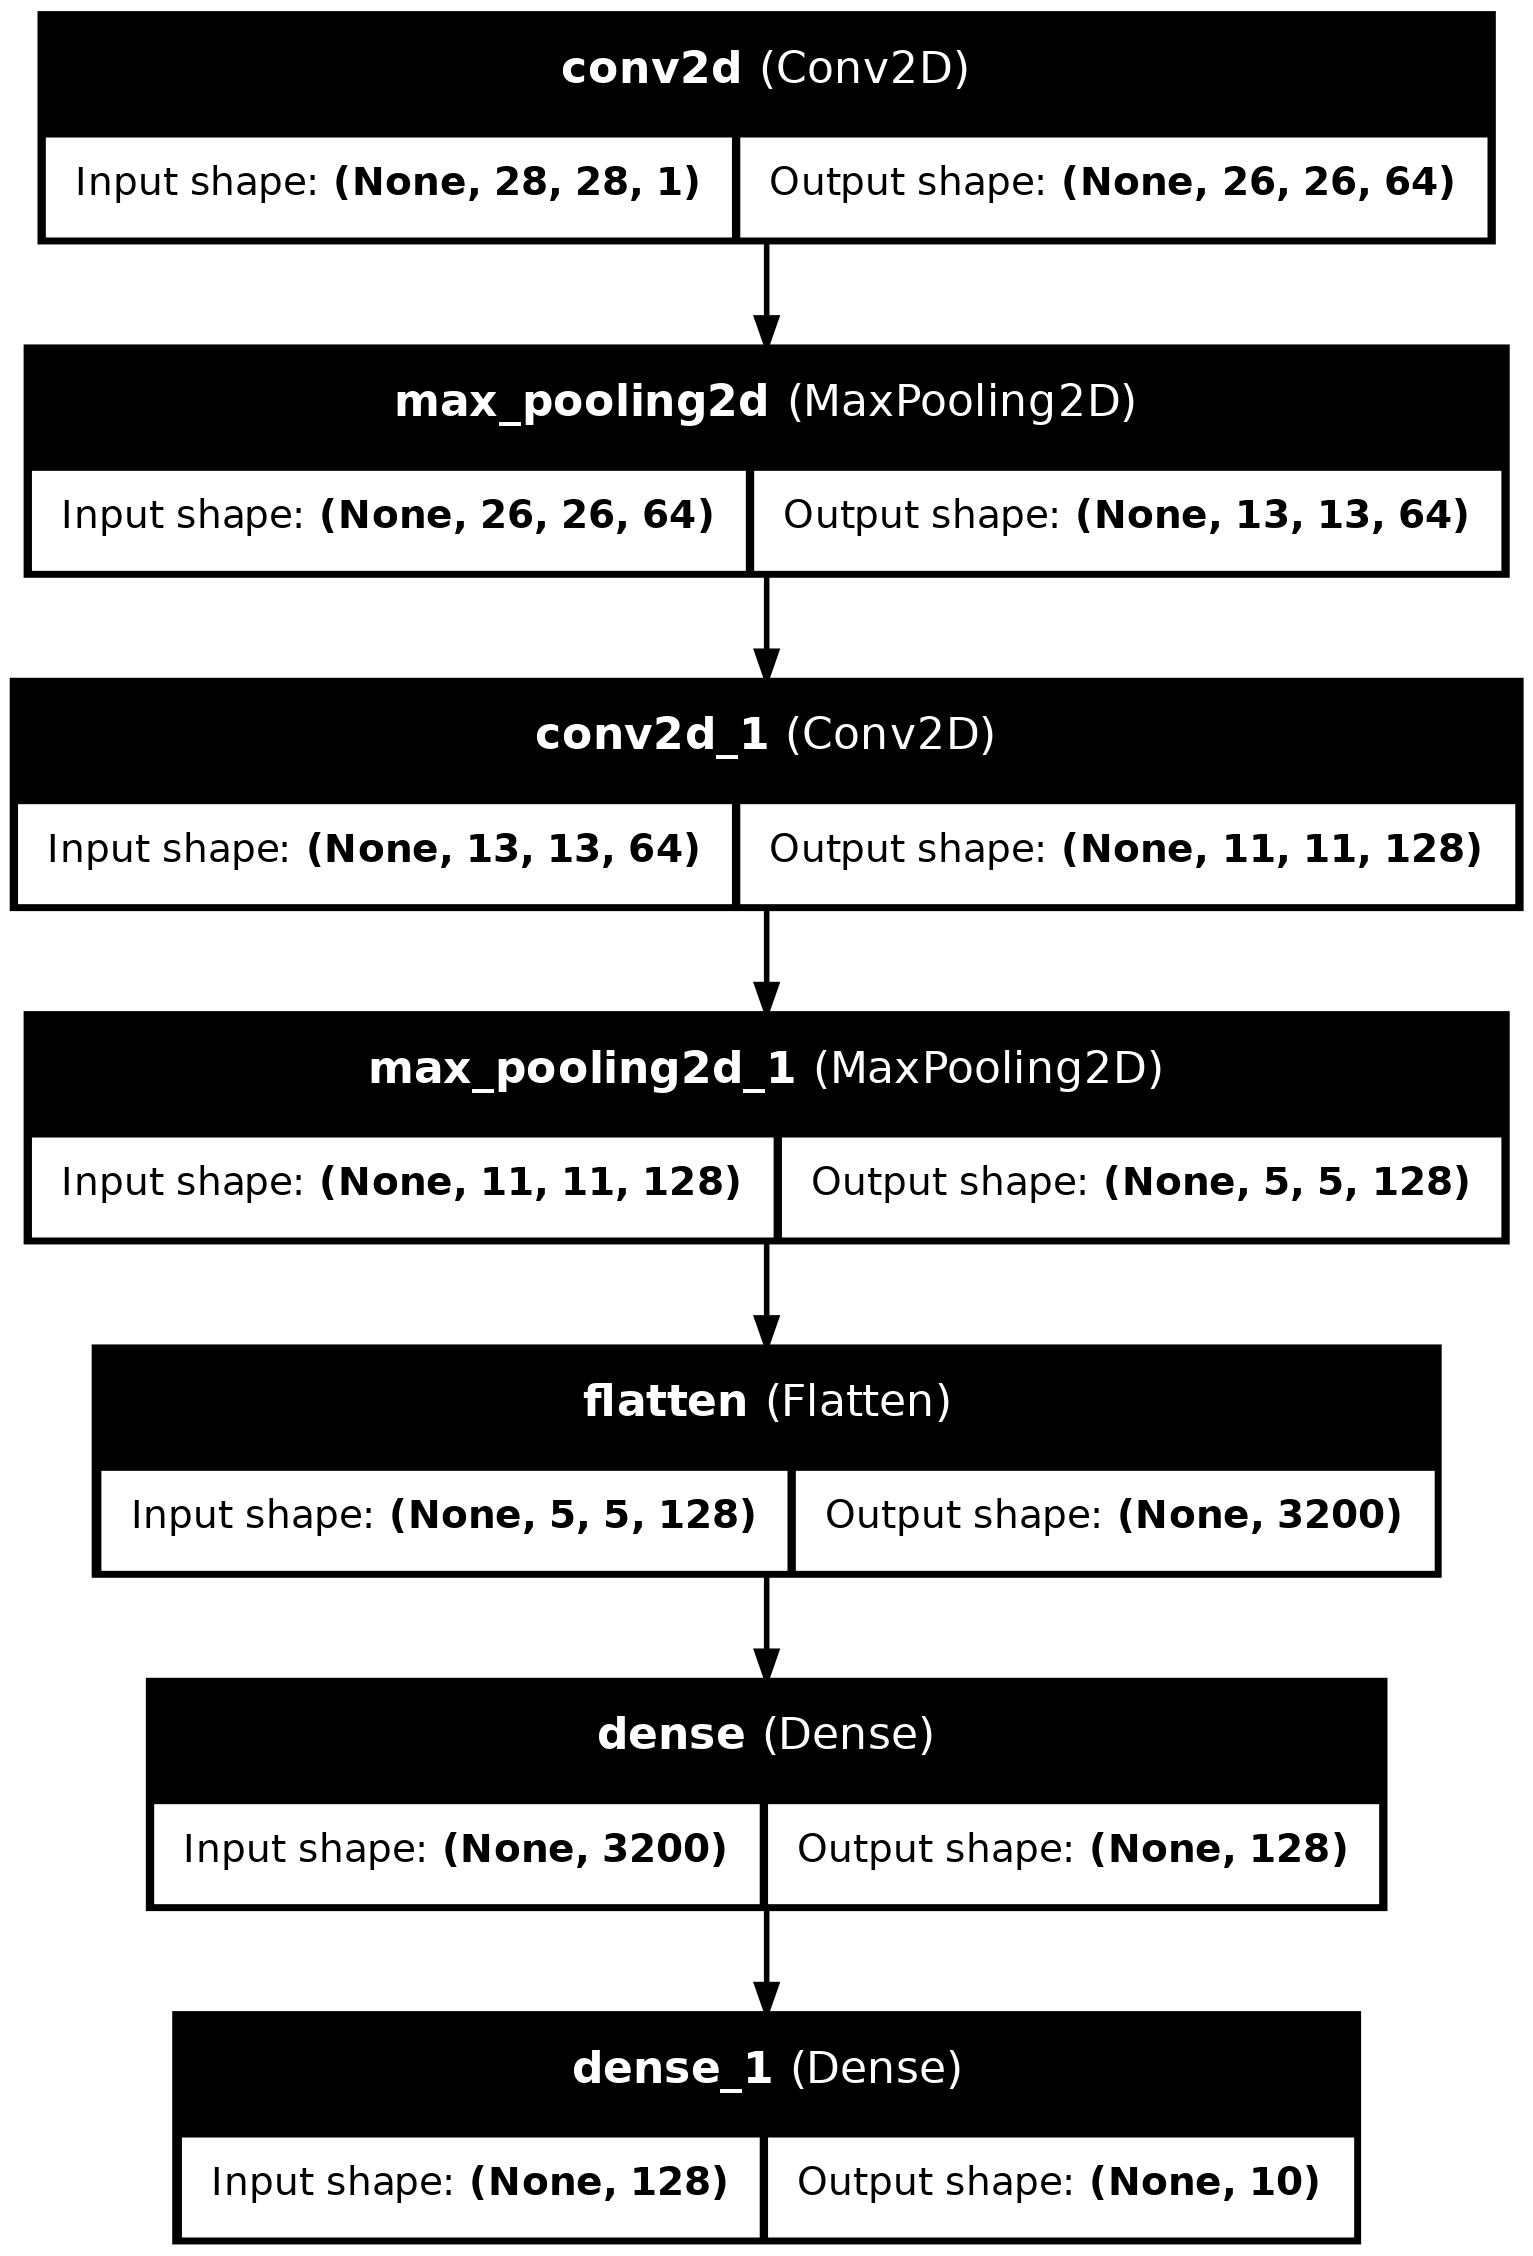

In [38]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [39]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9586 - loss: 0.1345 - val_accuracy: 0.9865 - val_loss: 0.0457
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9908 - val_loss: 0.0320
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9903 - val_loss: 0.0295
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9900 - val_loss: 0.0345
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9947 - loss: 0.0153 - val_accuracy: 0.9890 - val_loss: 0.0388


In [41]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0324 


In [42]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [44]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000847%
1: 0.0000000014%
2: 0.0000186494%
3: 0.0000413673%
4: 0.0000000004%
5: 0.0000000100%
6: 0.0000000000%
7: 99.9999403954%
8: 0.0000005071%
9: 0.0000001490%


In [45]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [46]:
len(incorrect_predictions)

104

In [47]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [48]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [49]:
display_probabilities(predictions[321])

0: 0.0131564535%
1: 0.0006051645%
2: 90.0763988495%
3: 0.1740060514%
4: 0.0000000469%
5: 0.0000000016%
6: 0.0000000013%
7: 9.6373580396%
8: 0.0981794321%
9: 0.0002961450%


In [50]:
cnn.save('mnist_cnn.keras')

In [51]:
from tensorflow.keras.models import load_model

In [52]:
cnn = load_model('mnist_cnn.keras')